In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('Fiverr dataset with names.csv')

In [3]:
dataset.head()

,Year,Month,Core,Water vol.,Dependent Variable,Temperature,d13C-CO2,d13C-CH4,TN,TOC,TC,CN,Corg,BD 10cm,WC 10cm,BD 3cm,WC 3cm,Soil volume,Salinity
0,2021,5,1,440,75.907512,34.5,-12.402,-43.065,0.068,0.653,7.023,11.253468,1.892,1.10,44.14,0.97,64.33,746.00,12.26
1,2021,5,2,420,-476.199484,34.5,-12.730,-44.273,0.065,0.637,7.154,11.437254,1.826,1.28,40.89,0.96,61.60,728.66,11.26
2,2021,5,3,440,253.094895,34.5,-12.280,-43.719,0.074,0.660,6.864,10.359396,1.964,1.06,45.88,0.99,57.83,728.66,10.83
3,2021,5,4,420,-405.403059,34.5,-12.309,-43.657,0.061,0.523,6.944,10.048683,1.329,1.19,39.60,0.85,68.72,832.75,15.52
4,2021,7,1,520,264.360247,34.5,-12.058,-30.921,0.117,1.186,7.838,11.805598,4.536,1.11,41.71,1.27,37.06,763.35,NaN


In [4]:
nan = dataset.isnull().sum()

print("Columns with Nan:")
print(nan[nan > 0])

Columns with Nan:
Salinity    32
dtype: int64


In [5]:
dataset = dataset.drop(['Salinity'], axis = 1)

In [6]:
X = dataset.drop(['Dependent Variable'], axis = 1)
y = dataset['Dependent Variable']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2:.4f}')

R-squared (R2) Score: -0.0657


##### checking for correlation

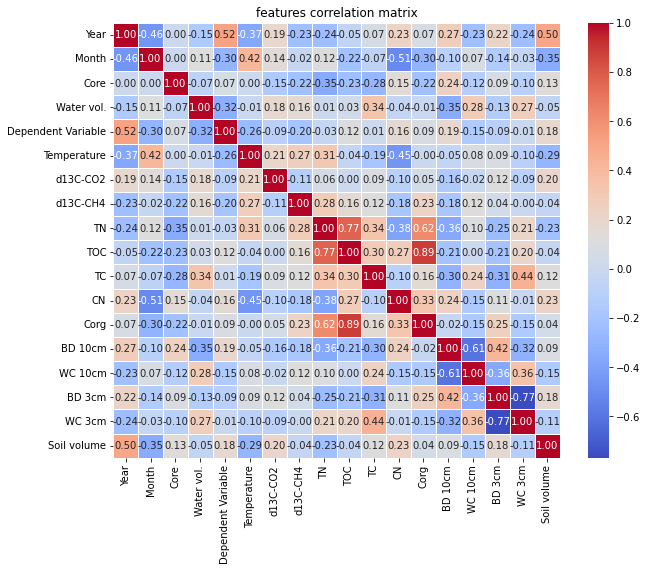

In [8]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('features correlation matrix')
plt.show()

#####  feature importance analysis

        Feature  Importance
6      d13C-CH4    0.359952
0          Year    0.141616
15       WC 3cm    0.108728
4   Temperature    0.106435
3    Water vol.    0.081442
16  Soil volume    0.039569
5      d13C-CO2    0.030216
13      WC 10cm    0.027801
10           CN    0.016343
11         Corg    0.015586
14       BD 3cm    0.014275
2          Core    0.012977
12      BD 10cm    0.012853
9            TC    0.011702
1         Month    0.008694
8           TOC    0.008254
7            TN    0.003555


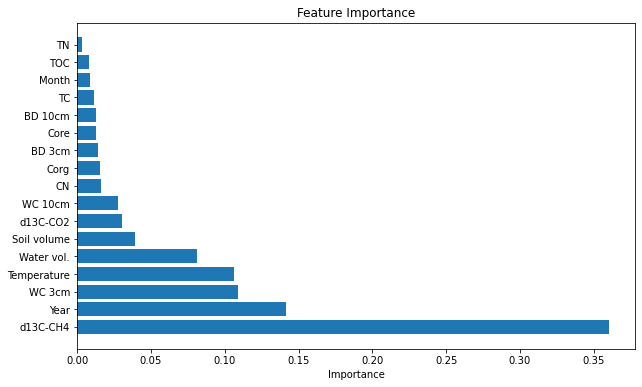

In [9]:
model = RandomForestRegressor()
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [10]:
X.columns

Index(['Year', 'Month', 'Core', 'Water vol.', 'Temperature', 'd13C-CO2',
       'd13C-CH4', 'TN', 'TOC', 'TC', 'CN', 'Corg', 'BD 10cm', 'WC 10cm',
       'BD 3cm', 'WC 3cm', 'Soil volume'],
      dtype='object')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=49) #I am going to use a random state of 49 because it works best for me, the value you set the random state will also affect the model

##### hyperparameter tuning using GridSearchCV

In [12]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model_rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Best R-squared: {r2:.4f}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best R-squared: 0.9367


In [13]:
cv_scores = cross_val_score(best_model, X, y, scoring='r2', cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [-5.41931765 -2.13959923 -9.25038916 -9.9923759  -1.57404684]


The model gave an impressive r2 score which is a good the but if you look take a look at the cross validation scores it isnt impressive so i have to carry out more analysis something like feature engineering to see if i would get a better cross validation score


##### Training and testing the model using the best hyperparemeter

In [14]:
rf_model = RandomForestRegressor( max_depth=  None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse:.4f}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2:.4f}')

R-squared (R2) Score: 0.9253


##### Scaling the data to search for a better performance

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf_model = RandomForestRegressor( max_depth=  10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')


R-squared: 0.9110


##### Feature Engineering(Adding more features)

In [16]:
dataset['Year'] = dataset['Year'].astype(str)
dataset['Month'] = dataset['Month'].astype(str)
dataset['TN_TOC_Ratio'] = dataset['TN'] / dataset['TOC']
dataset['Water_vol_log'] = dataset['Water vol.'].apply(lambda x: 0 if x == 0 else np.log(x))
dataset['Soil_volume_log'] = dataset['Soil volume'].apply(lambda x: 0 if x == 0 else np.log(x))
dataset['Water_Temperature_interaction'] = dataset['Water vol.'] * dataset['Temperature']
dataset['DepVar_Mean_by_YearMonth'] = dataset.groupby(['Year', 'Month'])['Dependent Variable'].transform('mean')
dataset['Combined_BD'] = (dataset['BD 10cm'] + dataset['BD 3cm']) / 2 
dataset['Combined_WC'] = (dataset['WC 10cm'] + dataset['WC 3cm']) / 2 

# I had to add more features to the data to make the model perform better

In [17]:
selected_features = ['Year', 'Water vol.', 'd13C-CH4', 'TN_TOC_Ratio',
                     'DepVar_Mean_by_YearMonth', 'Combined_BD', 'Combined_WC','WC 3cm']

In [18]:
# X = dataset[selected_features]
# y = dataset['Dependent Variable']
X = dataset.drop('Dependent Variable', axis=1)
y = dataset['Dependent Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=49) #i am going to add the radom state parameter to get consistent value, 49 works best for me

In [19]:
# NOTE: I got this parameters out of trial and error, we are not just looking for the best parameter but also a parameter that wont over fit the aata
rf_model = RandomForestRegressor(max_depth=  10, min_samples_leaf= 7, min_samples_split= 14, n_estimators= 100)
# rf_model = RandomForestRegressor(max_depth=  20, min_samples_leaf= 7, min_samples_split= 10, n_estimators= 150)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Squared Error: 11682104.3590
R-squared (R2) Score: 0.8462


In [20]:
cv_scores = cross_val_score(rf_model, X, y, scoring='r2', cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [ 4.50933905e-01  3.17880008e-04  5.04655619e-01 -5.87677556e-01
 -7.29426943e-01]


                          Feature    Importance
21       DepVar_Mean_by_YearMonth  8.679601e-01
6                        d13C-CH4  5.562763e-02
23                    Combined_WC  2.340201e-02
15                         WC 3cm  2.004640e-02
4                     Temperature  9.215501e-03
2                            Core  4.102710e-03
1                           Month  4.001716e-03
5                        d13C-CO2  3.705508e-03
22                    Combined_BD  3.216730e-03
9                              TC  2.250356e-03
13                        WC 10cm  2.050525e-03
10                             CN  1.657816e-03
17                   TN_TOC_Ratio  1.333661e-03
11                           Corg  5.293849e-04
16                    Soil volume  3.981028e-04
14                         BD 3cm  2.103949e-04
19                Soil_volume_log  7.406054e-05
3                      Water vol.  6.061177e-05
7                              TN  5.077944e-05
12                        BD 10cm  4.700

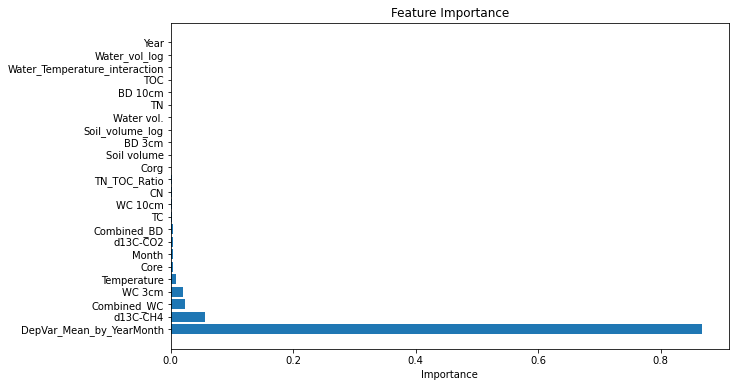

In [21]:
X = dataset.drop('Dependent Variable', axis=1)
y = dataset['Dependent Variable']
model = RandomForestRegressor(random_state=42, max_depth=  None, min_samples_leaf= 2, min_samples_split= 10, n_estimators= 100)
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [22]:
# I refused to remove any feature because somehow every feature has a roll to play in the model.

In [23]:
# I think the model would have performed better if we had a larger dataset